# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
data = pd.read_csv('data.csv') #чтение файла/datasets/data.csv

In [2]:
data.info() #оценка объема данных в представленной таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
data.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Для получения более подробной информации по каждому столбцу воспользуюсь методом value_counts, как наиболее информативной для общего представления данных в таблице.

In [4]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [5]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [6]:
data['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

In [7]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [8]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

In [9]:
data['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

<b>Вывод:</b>

В таблице 12 столбцов. Тип данных: float64(2), int64(5), object(5) 

В данных встречаются артефакты, пропуски, ошибки регистра, несоответствия, слабо коррелирующие с действительностью:
<br>1. В столбце days_employed - общий трудовой стаж и total_income - ежемесячный доход, есть пропуски. 
<br>2. В столбце dob_years - возраст клиента, 101 строк равны нулю
<br>3. В столбце education - уровень образования клиента, строчные буквы сочетаются с прописными
<br>4. В столбце children - количество детей в семье, значение (-1) – артефакт, а 20 слабо коррелируют с действительностью, скорее всего ошибка набора или вполне вероятно, семьи с приёмными детьми
<br>5. В столбце days_employed - общий трудовой стаж, присутствуют отрицательные значения и значения представлены как в днях, так и в часах
<br>6. В стобце purpose - цель получения кредита, различные написания целей имеют одинаковый смысл
<br>7. В столбцах total_income - ежемесячный доход и dob_years — возраст клиента, тип данных float. Возраст клиента лучше обозначить целым числом. Ну а копейки, даже налоговая отказывается принимать отчетность с копейками. 

    


## Шаг 2. Предобработка данных

### Обработка пропусков

Посчитаю, методом isna и sum, сколько в таблице пропущенных значений

In [10]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Трудно объяснить пропуски в стаже и доходах, кроме технических - банки не выдают кредиты без указания доходов. Хотя, впрочем, вполне вероятно, в таблицу внесены данные по кредитным картам.
Если, пропущенные данные в столбце days_employed не столь существенны для исследования, то данные в total_income необходимы для ответа на вопрос: Есть ли зависимость между уровнем дохода и возвратом кредита в срок? Так как не представляется возможность восполнить эти данные, а нулевые значения будут вносить искажение в результаты исследования, потому что человек не пожелавший указать уровень дохода, на самом деле этот доход имеет. И может получиться так, что человек не имеющий доход, исправно выплачивает кредит. Потому есть смысл удалить все строки с пропущенными данными в колонке total_income. Но задачей проекта является отработка навыков в обработке данных, потому заполню пропущенные данные.

Так как, данные таблицы носят случайный характер, не имеющие логической последовательности и, следовательно, не могут быть описаны некой математической функцией - то самый простой подход заменить пропущенные значения средними значениями. 
Но прежде избавлюсь от артефактов и значений, выходящих за рамки действительности.
 

В столбце children есть отрицательные значения, а также 20 детей в 76 семьях слабо коррелируют с действительностью, потому буду считать эти значения технической ошибкой или ошибкой ввода. Избавлюсь от них.
Для вычисления в Python модуля числа используется функция abs и при помощи метода loc, исходя из простой логики, заменю 20 на 2 и -1 на 1. Такая замена не повлияет на результат исследования, но таблица будет выглядеть реально жизненной. 

In [11]:
data['children'] = abs(data['children']) 
data.loc[data['children'] == 20, 'children'] = 2
data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Избавлюсь от отрицательных значений в  столбце days_employed при помощи функции abs.

In [12]:
data['days_employed'] = abs(data['days_employed']) 

В столбце days_employed есть значения, которые в силу своей величины скорее соотносятся к стажу, измеряемой часами, нежели сутками. Исправлю это при помощи метода loc. Чтобы заменить значения в часах на дни, необходимо принять разумную границу отсечки. Самому старшему заёмщику 75 лет. Если даже он начал трудовую деятельность в 15 лет, то его стаж в днях составит 60 помножить на 365 получим 21900. Возьмём для отсечки значение 22000. Вполне вероятно, что в таблице присутствуют значения в часах и менее 22000. Я это точно установить не могу, но сей факт никак не отразится на результатах исследования.

In [13]:
data.loc[data['days_employed'] >22000, 'days_employed'] = data.loc[data['days_employed'] >22000, 'days_employed'] / 24

In [14]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Заменю пропущенные значения в days_employed. Можно было взять среднее mean в целом по столбцу, но для точности сделаем это по типу занятости. 

In [15]:
print('Пропуски до:', data[ 'days_employed'].isna().sum())

Пропуски до: 2174


In [16]:
for income in data['income_type'].unique():
    mean = data.loc[data['income_type'] == income, 'days_employed'].mean()
    data.loc[(data['days_employed'].isna()) & (data['income_type'] == income), 'days_employed'] = mean
    
print('Пропуски после:', data[ 'days_employed'].isna().sum())

Пропуски после: 0


Заменю пропуски дохода в столбце total_income медианой взятой по income_type(тип занятости), gender(пол) и education(образование).

In [17]:
print('Пропуски до:', data['total_income'].isna().sum())

Пропуски до: 2174


Приведу дубликаты, где строчные буквы сочетаются с прописными,  к единому строчному формату:

In [18]:
data.education = data.education.str.lower()

Создам переменную q_temp, куда выведу медианы:

In [19]:
q_temp = data.pivot_table(index=['income_type', 'gender'], columns='education', values='total_income', aggfunc='median')

Создам функцию super_fillna_func, котоая будет вытягивать значения из q_temp

In [20]:
def super_fillna_func(income_type, gender, education):
    '''
    Находит в таблице q_temp нужную медиану.
    '''
    try:
        return q_temp.loc[(income_type, gender)][education]
    except:
        return 0

Применю фукцию super_fillna_func к столбцу 'total_income'

In [21]:
data['total_income'] = data['total_income'].fillna(data.apply(lambda row: super_fillna_func(row['income_type'], row['gender'], row['education']), axis=1))

In [22]:
print('Пропуски после:', data['total_income'].isna().sum())

Пропуски после: 0


In [23]:
# Вот так применяем к таблице.

# Запишем в новый столбец.
#df['new_income'] = df.apply(lambda row: super_fillna_func(row['income_type'], row['gender'], row['education']), axis=1)

# Пандас сам заменит пропуски значениями из нового столбца в той же строке.
#df['total_income'] = df['total_income'].fillna(df['new_income'])

Заменю средним нулевые значения в dob_years взятой по типу занятости.

In [24]:
print(data[data['dob_years'] == 0].count()[0])

101


In [25]:
for dob in data['income_type'].unique():
    mean = data.loc[data['income_type'] == dob, 'dob_years'].mean().astype('int')
    data.loc[(data['dob_years'] == 0) & (data['income_type'] == dob), 'dob_years'] = mean

In [26]:
print(data[data['dob_years'] == 0].count()[0])

0


<b>Вывод</b>
<br>Пропуски заполнил, артефакты удалил, таблица готова к следующему шагу обработки. Пенсионеры и безработные имеют очень хороший доход, по крайне мере для этого банка. Чтоб все так жили. 

### Замена типа данных

В колонке dob_years и total_income тип данных float64, который можно заменить на int, без ущерба к выводам исследования.

In [27]:
data = data.astype({'days_employed': int, 'total_income': int, 'dob_years': int})
data.dtypes

children             int64
days_employed        int32
dob_years            int32
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int32
purpose             object
dtype: object

<b>Вывод</b>
<br>Изменив типы данных, значения в ячейках приобрели логичный и удобный для вывода в таблицы вид

### Обработка дубликатов

Приведу дубликаты, где строчные буквы сочетаются с прописными,  к единому строчному формату:
В этом мне поможет функция str.lower()

In [28]:
#data['education'] = data['education'].str.lower() сделано выше
data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Методом duplicated и sum посчитаю количество полных дубликатов

In [29]:
data_duplicat = data.duplicated().sum()
data_duplicat

71

Если, верна моя гипотеза о том, что в таблицу внесены данные по кредитным картам, то наличие полных дупликатов не вызывает удивление - человек мог взять несколько карт. Но и верно другое - поскольку у нас нет уникальных идентификаторов пользователей, полные дубликаты вполне могут быть разными людьми. 

Методом drop_duplicates удалю дубликаты и использую метод reset_index для перезаписи индексов.

In [30]:
data = data.drop_duplicates().reset_index(drop = True)
data.duplicated().sum()

0

<b>Вывод</b>
<br>Обработка дупликатов завершена, таблица готова к следующему шагу обработки.

### Лемматизация

In [31]:
from pymystem3 import Mystem
m = Mystem()

Загрузил необходимые библиотеки, затем методом unique создам список уникальных значений столбца purpose, при помощи join получу строку и затем лемматизирую её.

In [32]:
text = data['purpose'].unique()
text

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [33]:
lemmas = ','.join(text)

In [34]:
lemmas = m.lemmatize(lemmas) 
from collections import Counter
print(Counter(lemmas)) 

Counter({' ': 59, ',': 37, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'подержать': 2, 'заниматься': 2, 'сделка': 2, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1, '\n': 1})


Лемматизация выявила следующие леммы, по которым можно  разбить цели кредита по категориям: недвижимость, автомобиль, образование, свадьба. Функцией lemmas_purpose, лемматизирую столбец purpose и создам новый столбец purpose_mod с изменёнными  значениями.

In [35]:
def lemmas_purpose(row):
    purpose = row['purpose']
    purpose_lemmas = m.lemmatize(purpose)
    
    if ('недвижимость' in purpose_lemmas or 'жилье' in purpose_lemmas):
        return 'недвижимость'
    elif 'автомобиль'in purpose_lemmas:
        return 'автомобиль'
    elif 'образование' in purpose_lemmas:
        return 'образование'
    elif 'свадьба' in purpose_lemmas:
        return 'свадьба'
    else:
        return 'цель не определена'

data['purpose_mod'] = data.apply(lemmas_purpose, axis=1)    
data['purpose_mod'].value_counts()

<b>Вывод</b>

Лемматизация - очень удобный инструмент для замены множества смысловых синонимов. 

(Очень плохо, что pymystem3 не работает в windows.)

### Категоризация данных

Основные категории для целей исследования исходят из вопросов в задании к проекту:

1. Имел ли задолженность по возврату кредитов из столбца debt. Значений всего 2: 
<br>0 - не имел задолженность
<br>1 - имел задолженность. 
<br>

2. Наличие детей в столбце children. Значений 6 - от 0 до 5. Так как, согласно заданию к проекту, необходимо найти зависимость от наличия детей, то сгруппирую столбец children в 2 категории:
<br>0 - нет детей
<br>1 - есть дети
<br>

4. family_status — семейное положение и family_status_id — идентификатор семейного положения. В этой категории из поставленной задачи можно свести к двум категориям: семейный/не семейный, но посмотрю эту категорюю более подробно, как есть:
<br>0 - женат / замужем
<br>1 - гражданский брак
<br>2 - вдовец / вдова
<br>3 - в разводе
<br>4 - Не женат / не замужем
<br>

5. Уровень ежемесячного дохода в столбце total_income. Разбивку на категории произвел без всякой логики. Какую градацию не возьмешь, если тенденция есть, она обнаружит себя:
<br>1 класс дохода: до 100000
<br>2 класс дохода:    100000 - 150000
<br>3 класс дохода:    150000 и 200000
<br>4 класс дохода:    200000 и выше
<br>

6. Цели кредита в столбце purpose_mod. Значений 4:
<br>недвижимость
<br>автомобиль
<br>образование
<br>свадьба


Поставленная банком задача сводится к простому сравнительному анализу вида (А - Б = С). Где А - клиентская база, Б - база должников, С - исследуемый результат. 
Создам базу должников data_dolg при помощи логической индексации:

In [ ]:
data_dolg = data[data['debt'] == 1]
data_dolg.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_mod
14,0,1844,56,высшее,0,гражданский брак,1,F,компаньон,1,165127,покупка жилой недвижимости,недвижимость
32,0,4649,34,среднее,1,гражданский брак,1,F,сотрудник,1,139057,на проведение свадьбы,свадьба
38,0,597,25,высшее,0,Не женат / не замужем,4,M,сотрудник,1,192247,образование,образование
55,0,15208,54,среднее,1,гражданский брак,1,F,пенсионер,1,112790,сыграть свадьбу,свадьба
75,1,2953,38,среднее,1,женат / замужем,0,M,сотрудник,1,81935,операции с недвижимостью,недвижимость


Создам базу клиентов без долга data_bez_dolga при помощи логической индексации:

In [ ]:
data_bez_dolga = data[data['debt'] == 0]
data_bez_dolga.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_mod
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,1,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба


Для облегчения расчетов введу переменные data_len - количество клиентов банка, dolznik - количество должников, bez_dolga - количество клиентов без долга: И выведу значения на экран:

In [ ]:
data_len = len(data)
dolznik = len(data_dolg)
bez_dolga = len(data_bez_dolga)
print('Клиентов банка:', data_len)
print('Должники:', dolznik)
print('Клиенты без долга:', bez_dolga)

Клиентов банка: 21454
Должники: 1741
Клиенты без долга: 19713


<b>Вывод</b>
<br>Таблица полностью прошла процесс предобработки данных, дополнительно создана база должников, всё готово для ответа на поставленные вопросы. 

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

В задании к проекту, необходимо выявить - влияет количество детей клиента на факт погашения кредита в срок, а вопросе ставится задача - есть ли зависимость между наличием детей и возвратом кредита в срок?
Потому ответим на два вопроса.

Выявлю, как количество детей клиента влияет на факт погашения кредита в срок. 

In [ ]:
data.groupby('children')['debt'].agg(['count', 'sum', lambda x: '{:.2%} '.format(x.mean())])

,count,sum,<lambda_0>
children,,,
0,14091,1063,7.54%
1,4855,445,9.17%
2,2128,202,9.49%
3,330,27,8.18%
4,41,4,9.76%
5,9,0,0.00%


Определю зависимость между наличием детей и возвратом кредита в срок:

Для чего, в столбце children заменю значения на (0 - нет детей / 1 - есть дети)

In [ ]:
data.loc[data['children'] >= 1, 'children'] = 1
data['children'].value_counts()

0    14091
1     7363
Name: children, dtype: int64

И снова, применю группировку: 

In [ ]:
dg_children = data.groupby('children')['debt'].agg(['count', 'sum', lambda x: '{:.2%} '.format(x.mean())])
dg_children

,count,sum,<lambda_0>
children,,,
0,14091,1063,7.54%
1,7363,678,9.21%


<b>Вывод</b>
<br>Зависимость между наличием детей и возвратом кредита в срок существует, доля должников с детьми на 1.8% превышает долю клиентов без детей.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Ответить на вопрос мне поможет метод groupby для группировки и метод агрегации данных agg:

Здесь, можно было обойтись одной командой, но мне не понравилась таблица в таком варианте. 
Потому, громоздкое решение, но с чуть красивей таблицей.

In [ ]:
family_data = data.groupby('family_status').agg({'family_status':'count'})
#family_data['%'] = family_data['family_status'] / data_len * 100
#family_data

In [ ]:
family_dolg = data_dolg.groupby('family_status').agg({'family_status':'count'})
#family_dolg['%'] = family_dolg['family_status'] / data_len * 100


In [ ]:
family_doly = family_dolg / family_data * 100

При помощи метода concat объединю три таблицы в одну  и выведу её на экран:

In [ ]:
df_family = pd.concat([family_data, family_dolg, family_doly], sort=False, axis=1, keys=['Количество клиентов', 'Должники', 'Доля должников, %'])
print(df_family)

                      Количество клиентов      Должники Доля должников, %
                            family_status family_status     family_status
family_status                                                            
Не женат / не замужем                2810           274          9.750890
в разводе                            1195            85          7.112971
вдовец / вдова                        959            63          6.569343
гражданский брак                     4151           388          9.347145
женат / замужем                     12339           931          7.545182


Удалю нижние уровни в названиях столбца:

In [ ]:
df_family.columns.droplevel(1) # уровни 0 и 1. Сбрасываем нижний уровень, поэтому 1. 

In [ ]:
df_family.columns = df_family.columns.droplevel(1) # уровни 0 и 1. Сбрасываем нижний уровень, поэтому 1. 

df_family

,Количество клиентов,Должники,"Доля должников, %"
family_status,,,
Не женат / не замужем,2810,274,9.750890
в разводе,1195,85,7.112971
вдовец / вдова,959,63,6.569343
гражданский брак,4151,388,9.347145
женат / замужем,12339,931,7.545182


Выведу таблицу для наглядности

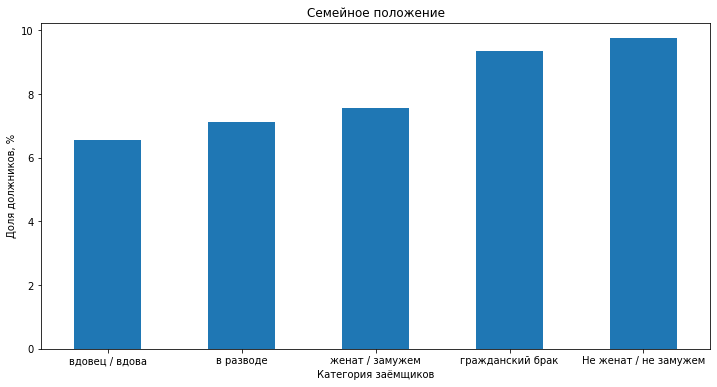

In [ ]:
import matplotlib.pyplot as plt

df_family['Доля должников, %'].sort_values().plot.bar(figsize=(12,6))

plt.xticks(rotation=0)
plt.title('Семейное положение')
plt.xlabel('Категория заёмщиков')
plt.ylabel('Доля должников, %')

plt.show()

<b>Вывод</b>
<br>Зависимость между семейным положением и возвратом кредита в срок прослеживается явно. Как ни странно, самыми ответственными кредитополучатели, это - вдовец / вдова. Правда их наименьшее количество, следовательно вероятность невозврата меньше. Самые рискованые - холостяки. Минимум отвественности и максимум самоуверенности.  

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
total_income_one = len(data[data['total_income'] <= 100000]) 
total_income_two = len(data[((data.total_income > 100000) & (data.total_income <= 150000))]) 
total_income_tri = len(data[((data.total_income > 150000) & (data.total_income <= 200000))]) 
total_income_for = len(data[data['total_income'] > 200000]) 
                                                          

In [ ]:
ti_dolg_one = len(data_dolg[data_dolg['total_income'] <= 100000])
ti_dolg_two = len(data_dolg[((data_dolg.total_income > 100000) & (data_dolg.total_income <= 150000))])
ti_dolg_tri = len(data_dolg[((data_dolg.total_income > 150000) & (data_dolg.total_income <= 200000))])
ti_dolg_for = len(data_dolg[data_dolg['total_income'] > 200000]) 


In [ ]:
ti_dolg_one_doly = ti_dolg_one / total_income_one * 100
ti_dolg_two_doly = ti_dolg_two / total_income_two * 100
ti_dolg_tri_doly = ti_dolg_tri / total_income_tri * 100
ti_dolg_for_doly = ti_dolg_for / total_income_for * 100

In [ ]:
df_total_income = pd.DataFrame({'Категория': ['<100000', '100000<150000', '150000<200000', '200000<'], 
                   'Количество клиентов': [total_income_one, total_income_two, total_income_tri, total_income_for],
                  'Должники': [ti_dolg_one, ti_dolg_two, ti_dolg_tri, ti_dolg_for],
                                'Доля должников, %': [ti_dolg_one_doly, ti_dolg_two_doly, ti_dolg_tri_doly, ti_dolg_for_doly]})
print(df_total_income)

       Категория  Количество клиентов  Должники  Доля должников, %
0        <100000                 4466       354           7.926556
1  100000<150000                 6845       584           8.531775
2  150000<200000                 5000       442           8.840000
3        200000<                 5143       361           7.019249


Таблица для наглядности:

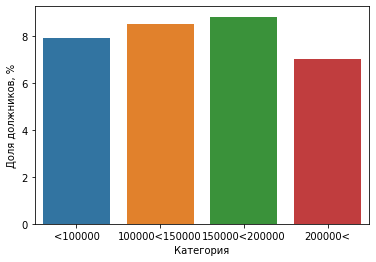

In [ ]:
seaborn.barplot(x=df_total_income['Категория'], y=df_total_income['Доля должников, %'])
plt.show()

<b>Вывод</b>
<br>Здесь наблюдается очень интересная зависимость между уровнем дохода и возвратом кредита в срок. Прибавку должников дают клиенты с доходами в интервале 100000 - 200000. Этому есть вполне логичное объяснение.

- Как разные цели кредита влияют на его возврат в срок?

In [ ]:
purpose_data = data.groupby('purpose_mod').agg({'purpose_mod':'count'})

In [ ]:
purpose_dolg = data_dolg.groupby('purpose_mod').agg({'purpose_mod':'count'})

In [ ]:
purpose_dolg_doly = purpose_dolg / purpose_data * 100

In [ ]:
df_purpose = pd.concat([purpose_data, purpose_dolg, purpose_dolg_doly], sort=False, axis=1, keys=['Количество клиентов', 'Должники', 'Доля должников, %'])
print(df_purpose)

             Количество клиентов    Должники Доля должников, %
                     purpose_mod purpose_mod       purpose_mod
purpose_mod                                                   
автомобиль                  4306         403          9.359034
недвижимость               10811         782          7.233373
образование                 4013         370          9.220035
свадьба                     2324         186          8.003442


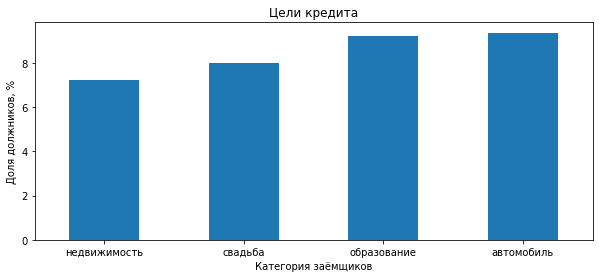

In [ ]:
import matplotlib.pyplot as plt

df_purpose['Доля должников, %', 'purpose_mod'].sort_values().plot.bar(figsize=(10,4))

plt.xticks(rotation=0)
plt.title('Цели кредита')
plt.xlabel('Категория заёмщиков')
plt.ylabel('Доля должников, %')

plt.show()

<b>Вывод</b>
<br>Основная доля кредитов приходится на долгосрочный кредит - ипотеку и здесь наблюдается 
относителное снижение должников. Заёмщики стараются гасить вовремя кредит, 
потому что под залогом находится жилье. А среднесрочные кредиты на автомобиль и образование 
показывают относительное увеличение должников. Нет такой отвественности как у ипотеки.

## Шаг 4. Общий вывод

В целом, по результатам исследования, нельзя выделить аномально высокую кредитную задолженность по какой-либо группе. 
<br>Группа "Наличие детей": должников без детей(7.54%) меньше должников с детьми(9.21%). 
<br>Группа "Семейное положение": наиболее отвественные в категории вдовец/вдова(6.57%), наименее - не женат/не замужем(9.75%.).
<br>Группа "Уровень доходов" - более всего должников в категории с доходами 150000-200000(8.84), заёмщики с доходами показывают лучший показатель возврата кредитов (7.02%).
<br>Группа "Цели кредита" - в категории Ипотека наиболее отвественные заёмщики(7.23% невозврата кредитов), наиболее безотвественные в категории Автомобиль(9.36% должников)

<br>Минимум должников в группе: вдовец / вдова - 6.57%, максимум в группе: Не женат / не замужем - 9.75%. Но с учетом того, что в этих группах количество выданных кредитов относительно мало, то я бы не стал их оценивать, как надёжных заёмщиков. С учетом количества выданных кредитов, я бы выделил надежных 2 группы: по цели кредита - ипотека (процент невозврата 7.23% на 10814 кредитов )и по семейному статусу - женат / замужем (процент невозврата 7.54% на 12344  кредитов ).

<br>Для объективного анализа не хватает денежных данных. Кредитные риски банка определяется объёмом просроченных кредитов в денежной единице, а не их количеством. Банку надо работать в тех категориях, которые создают высокую вероятность возникновения потерь при невозврате кредитов.

<br> Есть подозрение, что в таблицу включены данные по кредитным картам - недопустимо объединять два разных продукта.

<br>Увеличение должников в интервале доходности 100000<200000 связано с политикой банка по требованиям к заёмщику.  Скорее всего, вместо справки НДФЛ принимают справку о доходе с места работы, среди которых наблюдается высокий процент "липовых" справок. Потому, в этом сегменте, если это сопряжено с высокой долговой нагрузкой, необходимо менять политику в отношении клиентов. 

